In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
dataset = pd.read_excel("fruit_data_with_colours.xlsx")
def Euclidian_distance(row1, row2):
    #row1 represent training data set and row2 represent testing
    col = len(row1)
    distance = 0
    for i in range(col):
        distance += (row1[i]-row2[i])**2
    distance = np.sqrt(distance)
    return distance

Step2: Finding K nearest Neighbours with minimum distances

In [46]:
def get_neighbors(trainingSet,testingRow,k):
    distance_matrix = []
    for row_index, row in enumerate(trainingSet):
        distance = Euclidian_distance(testingRow[:-1],row[:-1])
        distance_matrix.append((row_index,distance))
        # row = distance_matrix[len(distance_matrix)-1][0]+1
        # print(f"Distance from row {row} has distance {distance}")
    sorted_distances = sorted(distance_matrix, key=lambda x: x[1])
    k_neighbors = sorted_distances[:k]
    return k_neighbors

Getting Maximum Occuring Class

In [47]:
def predict_classification(trainingSet, testingSet, k):
    k_neighbours = get_neighbors(trainingSet,testingSet, k)
    Class_values = []
    for neighbor in k_neighbours:
        Class_values.append(dataset.iloc[neighbor[0]-2][0])
    pred= max(set(Class_values), key=Class_values.count)
    return pred
predict_classification(dataset.values[1:],dataset.iloc[0, 1:].values,5)
# print(dataset.iloc[12])

C:\Users\Syed Sarib Naveed\AppData\Local\Temp\ipykernel_1448\1882587557.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Class_values.append(dataset.iloc[neighbor[0]-2][0])


1.0

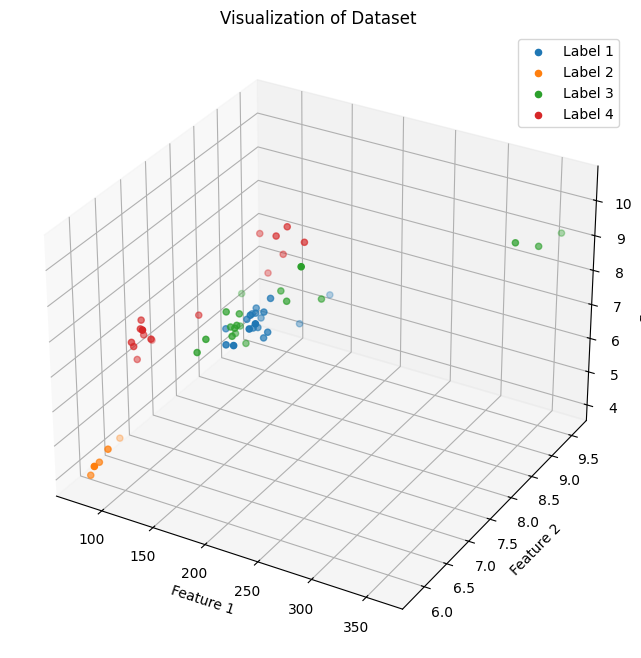

In [48]:
def visualize_dataset(dataset):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Extract features and labels
    features = dataset.iloc[:, 1:]
    labels = dataset.iloc[:, 0]

    # Get unique labels
    unique_labels = labels.unique()

    # Plot each label with a different color
    for label in unique_labels:
        subset = dataset[dataset.iloc[:, 0] == label]
        ax.scatter(subset.iloc[:, 1], subset.iloc[:, 2], subset.iloc[:, 3], label=f'Label {int(label)}')

    ax.set_title('Visualization of Dataset')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.legend()
    plt.show()

# Visualize the dataset
visualize_dataset(dataset)